In [125]:
import pandas as pd
import numpy as np
import matplotlib as mat
import seaborn as sns

df = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [146]:
df2 = df.groupby(['Player'])

In [147]:
for key, item in df2:
    print(df2.get_group(key), "\n\n")

    Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
49   INF  Ackerman      HLE  Support    Amumu      0       3        4   
68   INF  Ackerman      RED  Support     Nami      0       2        5   
138  INF  Ackerman      PCE  Support    Rakan      0       2       12   
199  INF  Ackerman      LNG  Support    Braum      0       3        1   

     Creep Score  Gold Earned  ...  Wards Destroyed  Ward Interactions  \
49            35         6137  ...               12                 59   
68            21         6744  ...               18                 61   
138           51         7715  ...               21                 83   
199           28         4714  ...                6                 45   

     Dragons For  Dragons Against  Barons For  Barons Against  Result  games  \
49             1                3           0               1       L      1   
68             3                2           0               1       L      2   
138            0       

    Team  Player Opponent Position      Champion  Kills  Deaths  Assists  \
57   PCE  Violet      LNG      Adc  Miss Fortune      2       2        2   
137  PCE  Violet      INF      Adc         Xayah      3       1        7   
156  PCE  Violet      HLE      Adc      Tristana      1       4        3   
186  PCE  Violet      RED      Adc        Lucian      8       4       10   

     Creep Score  Gold Earned  ...  Wards Destroyed  Ward Interactions  \
57           207         8409  ...                8                 20   
137          342        14369  ...                8                 19   
156          220         9588  ...               10                 22   
186          245        12893  ...               13                 25   

     Dragons For  Dragons Against  Barons For  Barons Against  Result  games  \
57             1                2           0               0       L      1   
137            4                0           1               0       W      2   
156     

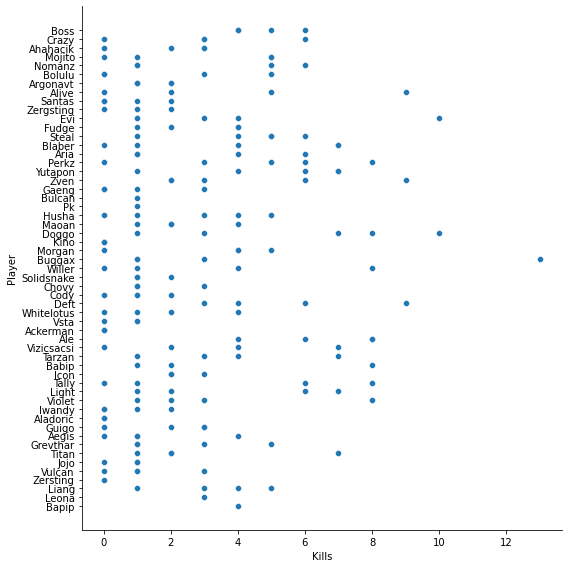

In [128]:
sns.relplot(data = df , y ="Player" , x='Kills' , height=8)

In [129]:
df['games'] = df.groupby("Player").cumcount()+1


In [130]:
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,...,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result,games
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,...,0.78,8,8,16,0,4,0,1,L,1
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,...,0.52,10,7,17,4,0,1,0,W,1
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,...,0.78,8,14,22,0,4,0,1,L,1
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,...,0.65,12,8,20,4,0,1,0,W,1
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,...,0.56,6,9,15,0,4,0,1,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,...,0.32,24,6,30,4,1,1,1,W,5
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,...,0.71,35,16,51,1,4,1,1,L,5
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,...,0.74,15,5,20,4,1,1,1,W,5
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,...,0.50,16,8,24,1,4,1,1,L,5


In [123]:
df["kill_avg"] = df.groupby("Player").sum().mean()

In [193]:
df2 = df
test = df.groupby(['Player' , 'Position']).mean()

In [204]:
avg = test['Kills'].mean()
avgd = test['Deaths'].mean()
test = test.drop( test[ (test['Kills'] < avg) | (test['Deaths'] < avgd) ].index)


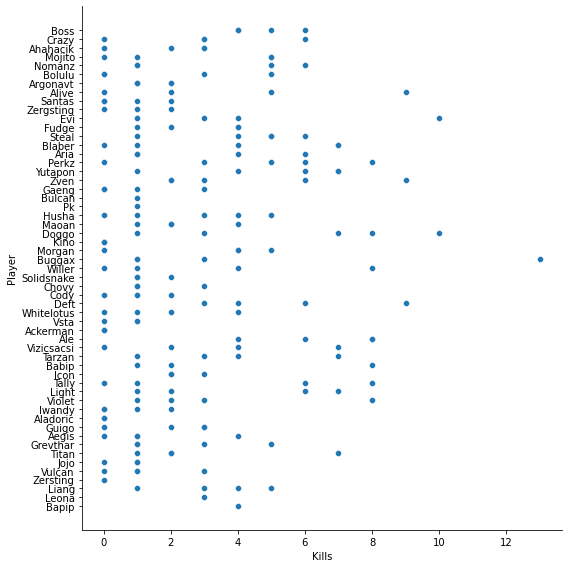

In [212]:
sns.relplot(data = df2, y="Player" ,  x='Kills', height=8)

In [240]:
test

,,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,games,kill_avg,test
Player,Position,,,,,,,,,,,,,,,,,
Alive,Adc,4.0,3.25,3.5,274.75,12462.0,0.2475,0.5650,13.75,8.75,22.5,2.00,2.25,0.5,0.50,2.5,NaN,NaN
Bapip,Jungle,4.0,5.00,1.0,162.00,9729.0,0.3700,0.7100,6.00,11.00,17.0,0.00,4.00,0.0,1.00,1.0,NaN,NaN
Boss,Top,4.6,4.20,3.8,204.40,11601.6,0.2340,0.7900,10.80,5.40,16.2,1.20,2.80,0.2,1.00,3.0,NaN,NaN
Buggax,Top,4.5,3.00,1.0,243.75,11761.5,0.3275,0.5175,11.50,4.50,16.0,1.25,2.75,0.0,0.75,2.5,NaN,NaN


In [227]:
import matplotlib.pyplot as plt

In [247]:
g = sns.catplot(y="Position", 
               data=df2, kind="bar")

TypeError: Vertical orientation requires numeric `y` variable.